In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install --upgrade tensorflow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 47.7 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.1
    Uninstalling tensorboard-2.17.1:
      Successfully uninstalled tensorboard-2.17.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.17.1
    Uninstalling tensorflow-2.17.1:
      Successfully uninstalled tensorflow-2.17.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.17.0 requires tensorflow<2.18,>=2.17, but you have tensorflow 2.18.0 which is incompatible.


In [3]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import matplotlib.pyplot as plt
import numpy as np
import os
from tensorflow.keras.preprocessing import image
print(tf.keras.__version__)  # This will print the Keras version included in TensorFlow


3.5.0


In [4]:
# Load the model
model = load_model("/content/drive/MyDrive/INDIVIDUALES/BENJI/KOKAS/INDIVIDUAL_PROYECTO/Models/MobileNet3.h5")

# Directory with images to predict
image_folder = "/content/drive/MyDrive/INDIVIDUALES/BENJI/KOKAS/INDIVIDUAL_PROYECTO/Dataset_Internet"


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Prediction for A_TEST.png: A


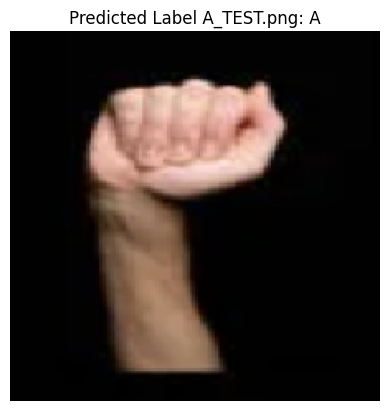

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Prediction for M_TEST.png: P


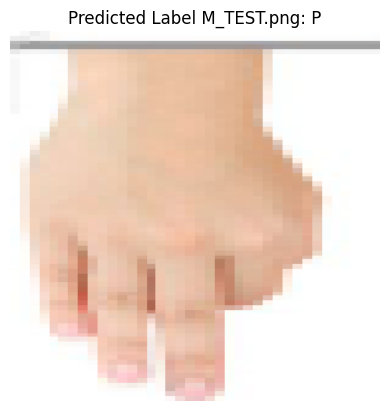

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Prediction for E_TEST.png: E


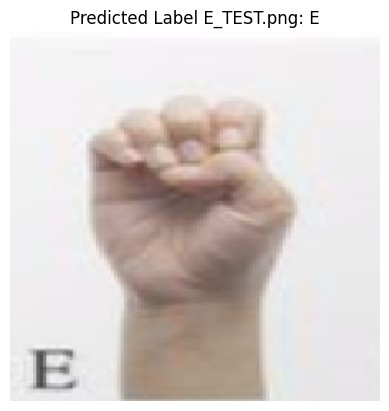

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Prediction for R_TEST.png: U


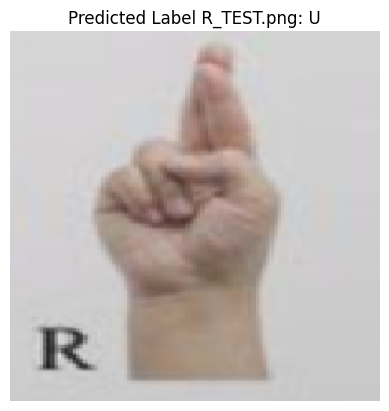

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Prediction for R_TEST_2.png: U


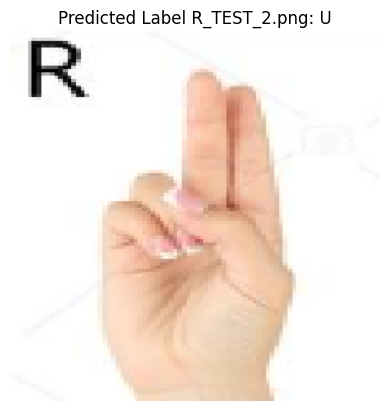

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Prediction for O_TEST.png: O


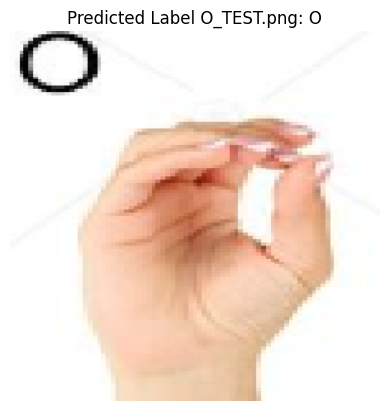

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Prediction for O_TEST_2.png: O


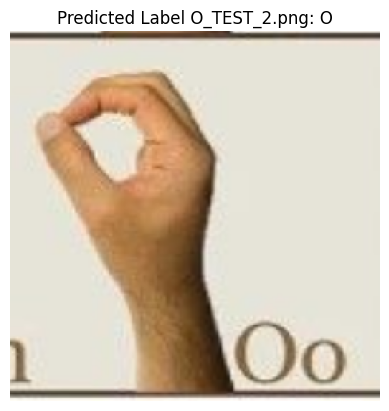

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
Prediction for C_TEST.png: C


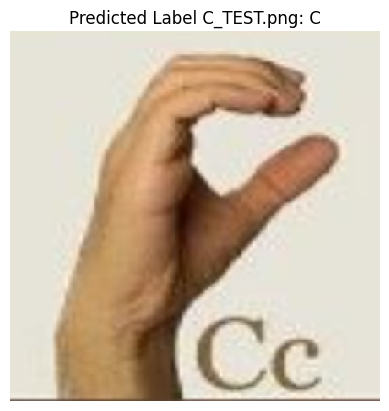

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
Prediction for NOTHING_TEST.png: Nothing


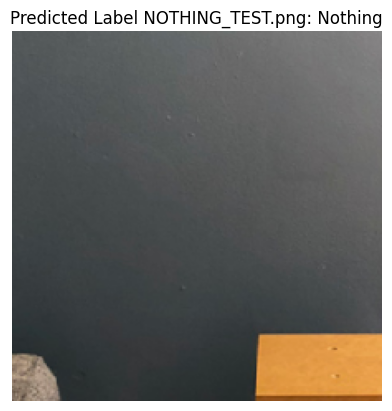

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
Prediction for R_test.png: R


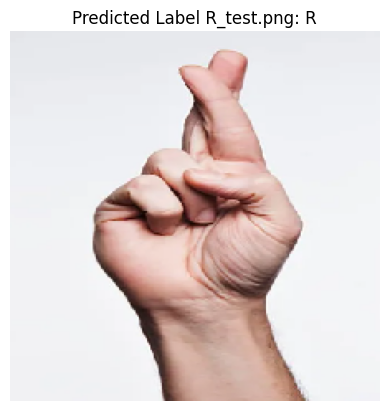

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Prediction for U_TEST.png: O


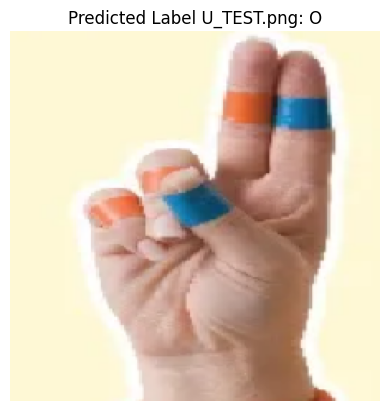

In [5]:

# Set image target size (replace with your model's expected input size)
image_size = (224, 224)  # Example for typical CNNs; adjust as needed
labels=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'Nothing', 'O', 'P', 'Q', 'R', 'S', 'Space', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
# Function to preprocess and predict for a single image
def predict_image(image_path):
    # Load and preprocess the image
    img = load_img(image_path, target_size=image_size)
    img_array = img_to_array(img) / 255.0  # Rescale pixel values if required by the model
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Predict and return the result
    prediction = model.predict(img_array)
    return prediction,img

# Iterate over all images in the folder and make predictions
for image_name in os.listdir(image_folder):
    image_path = os.path.join(image_folder, image_name)

    # Only process files that are images (you can add more extensions if needed)
    if image_path.endswith(('.png', '.jpg', '.jpeg')):
            # Obtiene la predicción (simulación)
            prediction,img = predict_image(image_path)  # Asumimos que esta función ya está definida
            pred_index = np.argmax(prediction)

            # Verificar si el índice coincide con la lista de etiquetas
            if 0 <= pred_index < len(labels):  # Asegura que el índice esté en el rango
                label_predicted = labels[pred_index]
                print(f"Prediction for {image_name}: {label_predicted}")
                # Mostrar la imagen y la etiqueta predicha
                plt.imshow(img)
                plt.title(f"Predicted Label {image_name}: {label_predicted}")
                plt.axis('off')
                plt.show()
            else:
                print("Prediction index out of labels range.")

